# Module - 2

# Visualization

In [1]:
import pandas as p
import numpy as n
import seaborn as s
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=p.read_csv('data.csv')

In [4]:
del data['S.No']

In [5]:
df=data.dropna()

In [6]:
df.columns

Index(['Crime', 'Gender', 'Age', 'Income', 'Job', 'Maritalstatus', 'Education',
       'Harm', 'Attack', 'AttackMethod', 'Perpetrator'],
      dtype='object')

Text(0.5, 1.0, 'Crime Detail')

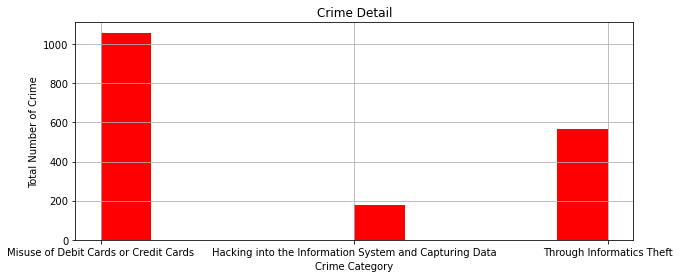

In [7]:
#Histogram
(df['Crime'].hist(figsize=(10,4), color='r', alpha=1))
plt.xlabel('Crime Category')
plt.ylabel('Total Number of Crime')
plt.title('Crime Detail')

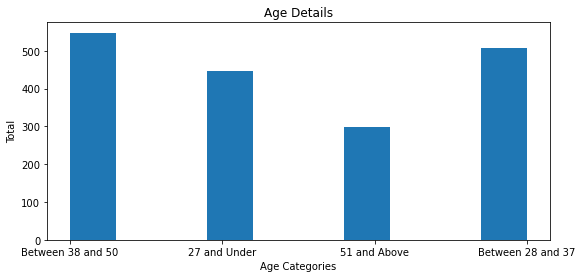

In [8]:
plt.figure(figsize=(9,4))
plt.hist(df['Age'])
plt.xlabel('Age Categories')
plt.title('Age Details')
plt.ylabel("Total")
plt.show()

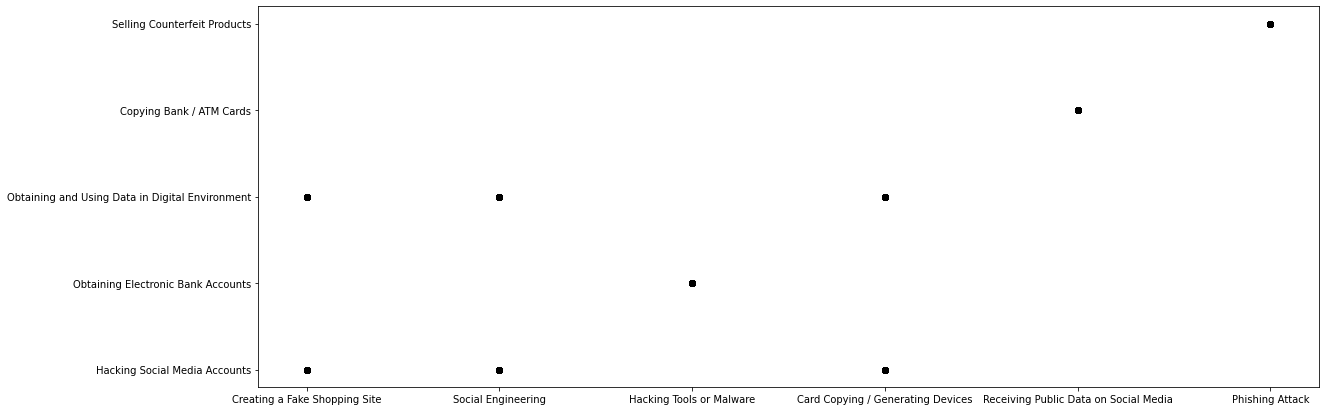

In [9]:
plt.figure(figsize=(19,7))
plt.scatter(x=df['AttackMethod'],y=df["Attack"], color='black')

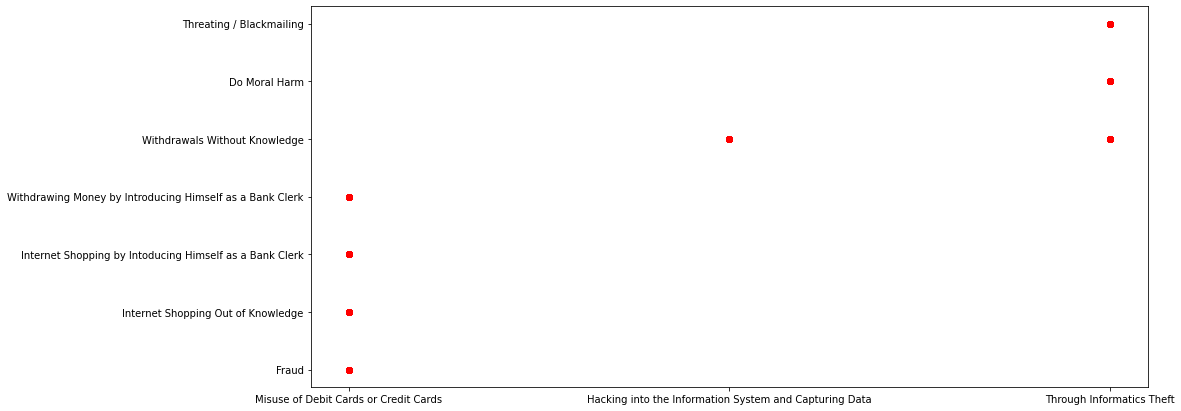

In [10]:
plt.figure(figsize=(15,7))
plt.scatter(df["Crime"],df["Harm"],color="red")

Technical                42.73
Student                  11.54
Health Sector Manager     9.77
Others                    9.43
Justice and Security      6.77
Retired                   6.33
Housewife                 4.99
Education                 4.11
Finance Sector            2.44
IT Sector                 1.89
Name: Job, dtype: float64

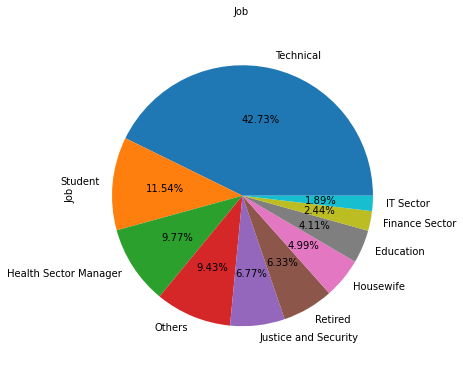

In [11]:
def Contract(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(6,6), autopct='%1.2f%%', fontsize = 10)
    ax.set_title(variable + ' \n', fontsize = 10)
    return n.round(dataframe_pie/df.shape[0]*100,2)

Contract(df, 'Job')

Internet Shopping Out of Knowledge                          31.30
Withdrawals Without Knowledge                               24.86
Internet Shopping by Intoducing Himself as a Bank Clerk     15.09
Do Moral Harm                                               14.10
Fraud                                                        7.55
Withdrawing Money by Introducing Himself as a Bank Clerk     4.77
Threating / Blackmailing                                     2.33
Name: Harm, dtype: float64

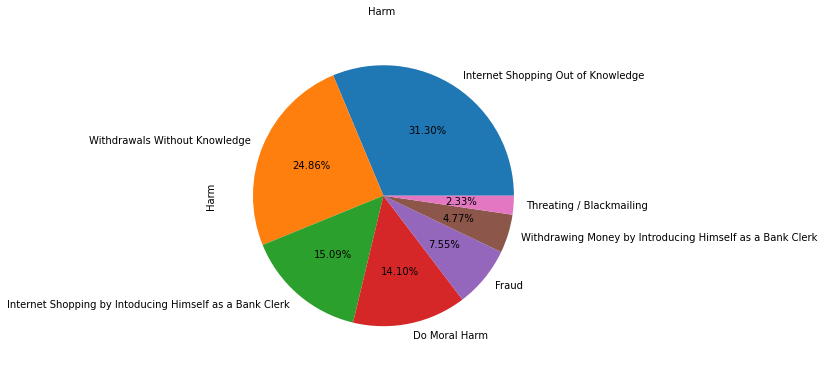

In [12]:
def Contract(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(6,6), autopct='%1.2f%%', fontsize = 10)
    ax.set_title(variable + ' \n', fontsize = 10)
    return n.round(dataframe_pie/df.shape[0]*100,2)

Contract(df, 'Harm')

Social Engineering                       53.50
Creating a Fake Shopping Site            15.54
Receiving Public Data on Social Media    12.43
Card Copying / Generating Devices         7.44
Hacking Tools or Malware                  5.99
Phishing Attack                           5.11
Name: AttackMethod, dtype: float64

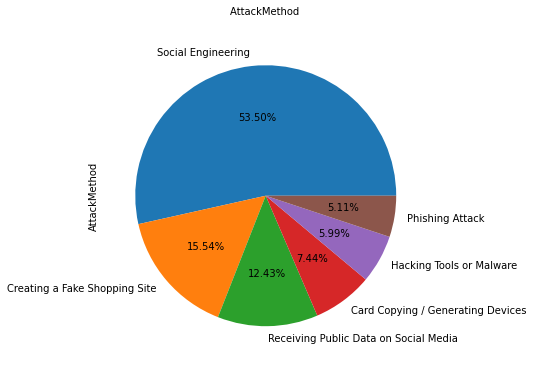

In [13]:
def Contract(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(6,6), autopct='%1.2f%%', fontsize = 10)
    ax.set_title(variable + ' \n', fontsize = 10)
    return n.round(dataframe_pie/df.shape[0]*100,2)

Contract(df, 'AttackMethod')

In [14]:
df.columns

Index(['Crime', 'Gender', 'Age', 'Income', 'Job', 'Maritalstatus', 'Education',
       'Harm', 'Attack', 'AttackMethod', 'Perpetrator'],
      dtype='object')

In [15]:
def Customer_Status(df, bygroup):
    dataframe_by_Group = p.crosstab(df[bygroup], columns=df["Attack"], normalize = 'index')
    dataframe_by_Group = n.round((dataframe_by_Group * 100), decimals=2)
    ax = dataframe_by_Group.plot.bar(figsize=(15,8));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(dataframe_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('Customer Status (%) (by ' + dataframe_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(dataframe_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return dataframe_by_Group

Attack,Copying Bank / ATM Cards,Hacking Social Media Accounts,Obtaining Electronic Bank Accounts,Obtaining and Using Data in Digital Environment,Selling Counterfeit Products
Perpetrator,,,,,
Known,12.02,62.92,4.86,10.23,9.97
UnKnown,12.75,44.90,6.86,34.12,1.37


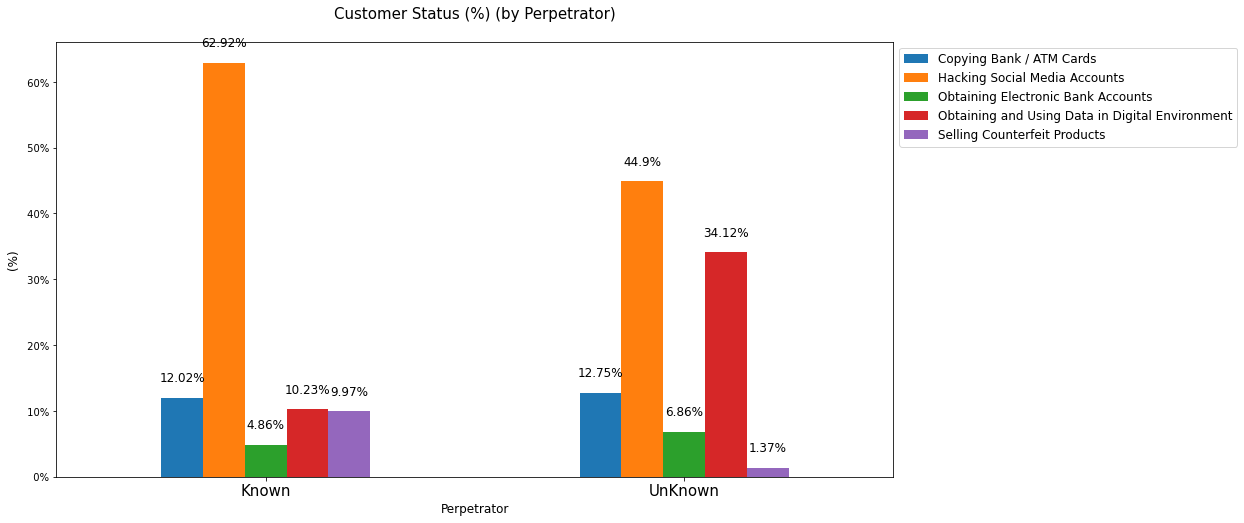

In [16]:
Customer_Status(df, 'Perpetrator')

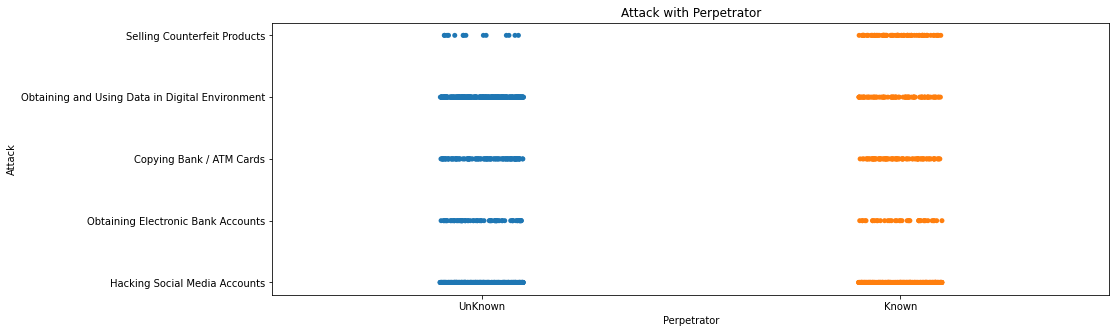

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
s.stripplot(y = df['Attack'], x = df['Perpetrator'], ax=ax)
plt.title("Attack with Perpetrator")
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
columns = ['Crime', 'Gender', 'Age', 'Income', 'Job', 'Maritalstatus',
       'Education', 'Harm', 'Attack', 'AttackMethod', 'Perpetrator']
for column in columns:
    df[column] = l.fit_transform(df[column]).astype(int)

<AxesSubplot:xlabel='Attack'>

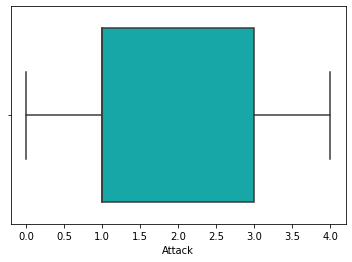

In [19]:
import seaborn as s
s.boxplot(df['Attack'], color='c')

<AxesSubplot:>

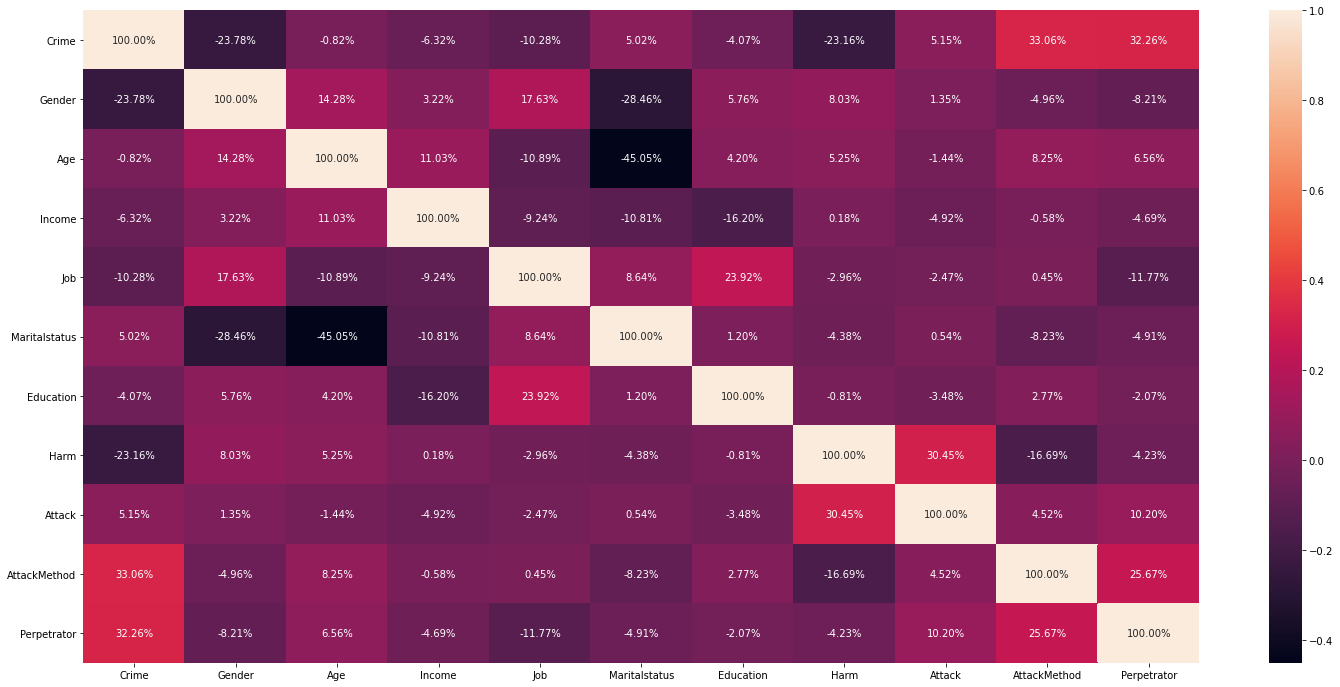

In [20]:
fig, ax = plt.subplots(figsize=(25,12))
s.heatmap(df.corr(),annot = True, fmt='0.2%',cmap = 'rocket',ax=ax)
#YlGnBu, Reds, tab10, rocket, mako, flare, crest, magma, viridis, cubehelix, YlOrBr, vlag, icefire, Spectral, coolwarm, Blues

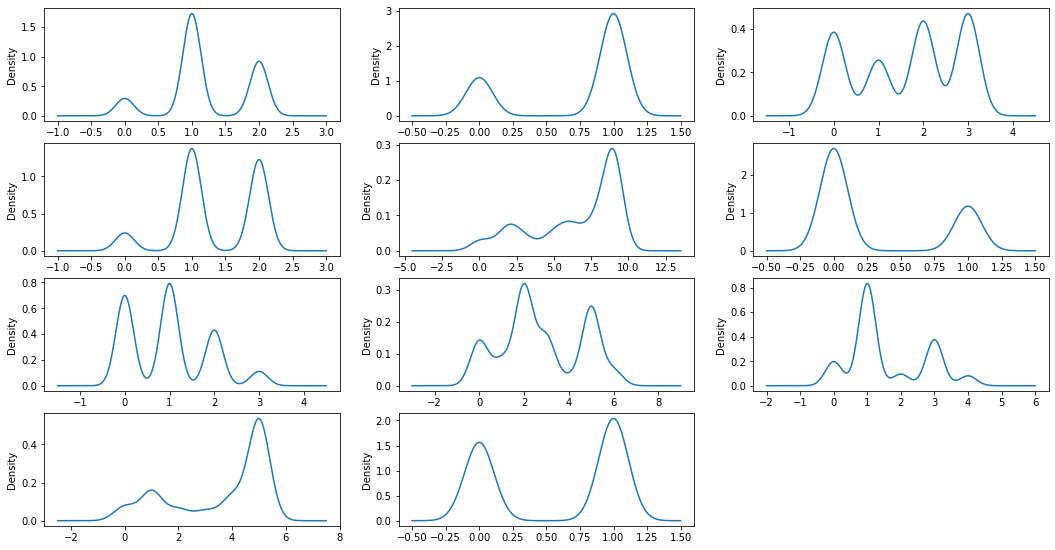

In [21]:
#Density Subplot
plt.figure(figsize= (18,12))
plt.subplot(5,3,1)
df["Crime"].plot(kind='density')
plt.subplot(5,3,2)
df["Gender"].plot(kind='density')
plt.subplot(5,3,3)
df["Age"].plot(kind='density')
plt.subplot(5,3,4)
df["Income"].plot(kind='density')
plt.subplot(5,3,5)
df["Job"].plot(kind='density')
plt.subplot(5,3,6)
df["Maritalstatus"].plot(kind='density')
plt.subplot(5,3,7)
df["Education"].plot(kind='density')
plt.subplot(5,3,8)
df["Harm"].plot(kind='density')
plt.subplot(5,3,9)
df["Attack"].plot(kind='density')
plt.subplot(5,3,10)
df["AttackMethod"].plot(kind='density')
plt.subplot(5,3,11)
df["Perpetrator"].plot(kind='density')
plt.show()

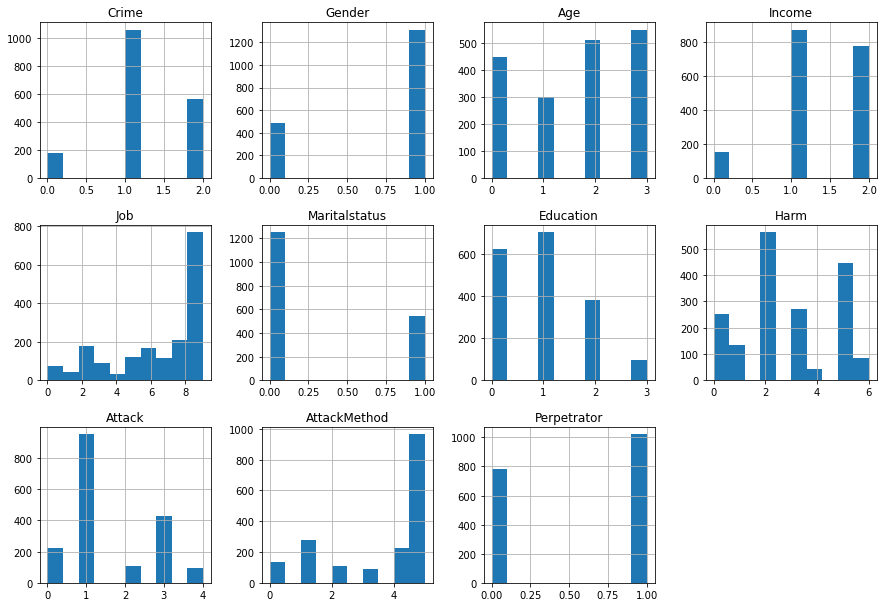

In [22]:
df.hist(figsize=(15,55),layout=(15,4))
plt.show()